In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sample function to discrete nodes

In [3]:
def sample_function(f, N=20):
    """Samples the function f at N points {x_j}, where
        x_j = -1 + 2(j-1)/N.
    """
    xgrid = np.asarray([-1 + 2*(j-1)/N for j in range(1,N+1)])
    return xgrid, f(xgrid)

In [4]:
L = 1
f = lambda x: x # analytic but not periodic
xs, ys = sample_function(f)

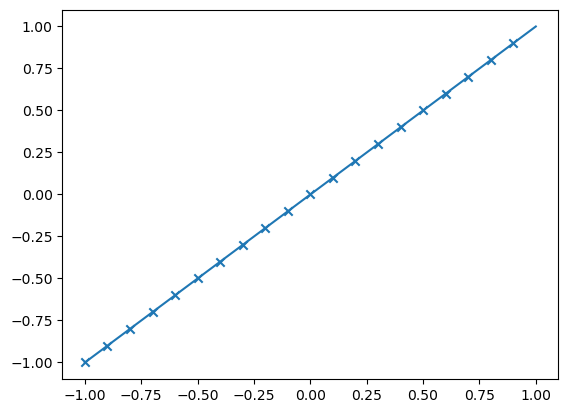

In [5]:
dom = np.linspace(-1,1,100)
plt.plot(dom, f(dom))
plt.scatter(xs, ys, marker="x")
plt.show()

# Get dft coefficients

In [31]:
def gen_problem_data(f, N=30):

    xs, ys = sample_function(f, N)

    dft_mat = make_dft_matrix(N)
    dft_conj_transpose_mat = make_dft_conj_transpose_matrix(N)

    dftcoeffs = dft_mat @ ys

    return xs, ys, dftcoeffs, dft_mat, dft_conj_transpose_mat

In [32]:
def make_dft_matrix(N):
    """Builds the DFT matrix F.
    """

    mat = np.zeros((N,N), dtype=np.complex128)
    xjs = np.asarray([-1 + 2*(j-1)/N for j in range(1,N+1)])

    for n in range(N):
        for i in range(N):
            mat[n,i] = (1.0/N)*np.exp( -1.0j*( (n+1) - 0.5*N - 1)*np.pi*xjs[i]  )

    return mat


def make_dft_conj_transpose_matrix(N):
    """Builds the unnormalized conjugate transpose DFT matrix F.
    """

    mat = np.zeros((N,N), dtype=np.complex128)
    xjs = np.asarray([-1 + 2*(j-1)/N for j in range(1,N+1)])

    for n in range(N):
        for i in range(N):
            mat[n,i] = np.exp( 1.0j*( (n+1) - 0.5*N - 1)*np.pi*xjs[i]  )

    return mat

In [33]:
F = make_dft_matrix(10)
Fct = make_dft_conj_transpose_matrix(10)

In [24]:
data = gen_problem_data(f)

In [25]:
np.fft.ifft( data[2], norm="ortho")

array([-1.00000000e+00-2.33403521e-18j, -9.33333333e-01-1.09149900e-16j,
       -8.66666667e-01+8.12789165e-17j, -8.00000000e-01+1.87122963e-17j,
       -7.33333333e-01+4.07393036e-17j, -6.66666667e-01+4.16977419e-17j,
       -6.00000000e-01-3.90024596e-17j, -5.33333333e-01+6.19286450e-17j,
       -4.66666667e-01-6.77272891e-17j, -4.00000000e-01+8.10963460e-17j,
       -3.33333333e-01-4.96569298e-17j, -2.66666667e-01+3.07449428e-17j,
       -2.00000000e-01-1.63401270e-17j, -1.33333333e-01+7.55923194e-17j,
       -6.66666667e-02+5.70408103e-17j,  4.05396130e-17+3.98541987e-18j,
        6.66666667e-02-1.78706688e-17j,  1.33333333e-01-1.04131812e-18j,
        2.00000000e-01-1.63401270e-17j,  2.66666667e-01-4.91757800e-17j,
        3.33333333e-01-9.71810420e-17j,  4.00000000e-01+3.34391728e-17j,
        4.66666667e-01-4.73244217e-17j,  5.33333333e-01+2.84124348e-17j,
        6.00000000e-01-3.90024596e-17j,  6.66666667e-01+3.24748921e-17j,
        7.33333333e-01+2.75870574e-17j,  8.00000000

In [22]:
data[1]

array([-1.        , -0.93333333, -0.86666667, -0.8       , -0.73333333,
       -0.66666667, -0.6       , -0.53333333, -0.46666667, -0.4       ,
       -0.33333333, -0.26666667, -0.2       , -0.13333333, -0.06666667,
        0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
        0.33333333,  0.4       ,  0.46666667,  0.53333333,  0.6       ,
        0.66666667,  0.73333333,  0.8       ,  0.86666667,  0.93333333])

In [34]:
from specrepro import gegenbauer_polynomial

In [35]:
def make_gegenbauer_matrix(N, m, lambdah=1):

    mat = np.zeros((N,m+1))
    xjs = np.asarray([-1 + 2*(j-1)/N for j in range(1,N+1)])

    for i in range(N):
        for n in range(m+1):
            mat[i,n] = gegenbauer_polynomial( (n+1) -1, lambdah,  xjs[i])

    return mat

In [36]:
make_gegenbauer_matrix(10, 11, lambdah=2)

array([[ 1.00000000e+00, -4.00000000e+00,  1.00000000e+01,
        -2.00000000e+01,  3.50000000e+01, -5.60000000e+01,
         8.40000000e+01, -1.20000000e+02,  1.65000000e+02,
        -2.20000000e+02,  2.86000000e+02, -3.64000000e+02],
       [ 1.00000000e+00, -3.20000000e+00,  5.68000000e+00,
        -6.78400000e+00,  5.04800000e+00, -1.94560000e-01,
        -6.36748800e+00,  1.18935552e+01, -1.34490394e+01,
         9.37283584e+00, -3.57343846e-01, -1.04532604e+01],
       [ 1.00000000e+00, -2.40000000e+00,  2.32000000e+00,
         2.88000000e-01, -3.91200000e+00,  5.23008000e+00,
        -2.10611200e+00, -3.83600640e+00,  7.81124864e+00,
        -5.72654592e+00, -1.81445775e+00,  9.14302624e+00],
       [ 1.00000000e+00, -1.60000000e+00, -8.00000000e-02,
         2.75200000e+00, -2.63200000e+00, -1.32608000e+00,
         4.74700800e+00, -2.63516160e+00, -3.56211456e+00,
         6.38707712e+00, -1.34609039e+00, -6.37359407e+00],
       [ 1.00000000e+00, -8.00000000e-01, -1.5200000

In [37]:
from scipy.special import gamma

In [ ]:
def make_fct_matrix(N, m, lambdah=1):

    xjs = np.asarray([-1 + 2*(j-1)/N for j in range(1,N+1)])
    
    #W = np.zeros((N,N))
    #H = np.zeros((m+1,m+1))

    Hdiag = np.power( (1 - (xjs**2) ), lambdah - 0.5)
    Wdiag = np.asarray([ np.sqrt(np.pi)*gegenbauer_polynomial(l, lambdah, 1.0)*gamma(lambdah + 0.5)/(gamma(lambdah)*gamma(l+lambdah)) for l in range(1, m+2)])
    H = np.diag(Hdiag)
    W = np.diag(Wdiag)

    fgeg_mat = make_gegenbauer_matrix(N, m, lambdah=lambdah)

    fct_mat = (2.0/N)*(H @ ( fgeg_mat.T @ W ) ) 

    return fct_mat